# V-Plot Analysis of DNA-Protein Binding Sites

## Introduction
For our BEE-102 assignment, I'm going to analyze how proteins interact with DNA using something called V-plots. These are super cool visualizations that show the pattern of DNA fragments that are protected when proteins bind to DNA.

When a protein binds to DNA, it shields that region from being cut by enzymes called nucleases. This protection creates a distinctive V-shaped pattern when we plot the fragments, which is what we're trying to see here!

## What We Need to Calculate

For each line in the data file, we need to calculate 3 main values:

1. **X-coordinate**: The difference between the centers of two DNA regions
   - First center (C1): average of columns 3 and 4 `(col3 + col4)/2`
   - Second center (C2): average of columns 9 and 10 `(col9 + col10)/2`
   - X = C2 - C1 (this tells us the relative position to the protein binding site)

2. **Y-coordinate**: The fragment size (column 10 - column 9)
   - This tells us how big each protected DNA fragment is

3. **Z-coordinate**: A counter that tells us how many fragments of size Y we found at position X
   - Basically counting how common each fragment size is at each position

For example, if we get a value like `-500 65 10`, it means that 500 bases away from the protein binding site (in the negative direction), we found 10 DNA fragments that were 65 base pairs long.

## Coding Approach

I'm going to tackle this analysis in a few steps:

1. Read the input data file
2. Calculate the X, Y, and Z values for each line
3. Create a dictionary to store the counts (Z) for each X and Y combination
4. Convert this data into a format we can plot
5. Create a heatmap/scatter plot to visualize the V-shape

Let's start by setting up our Python environment and reading the data!

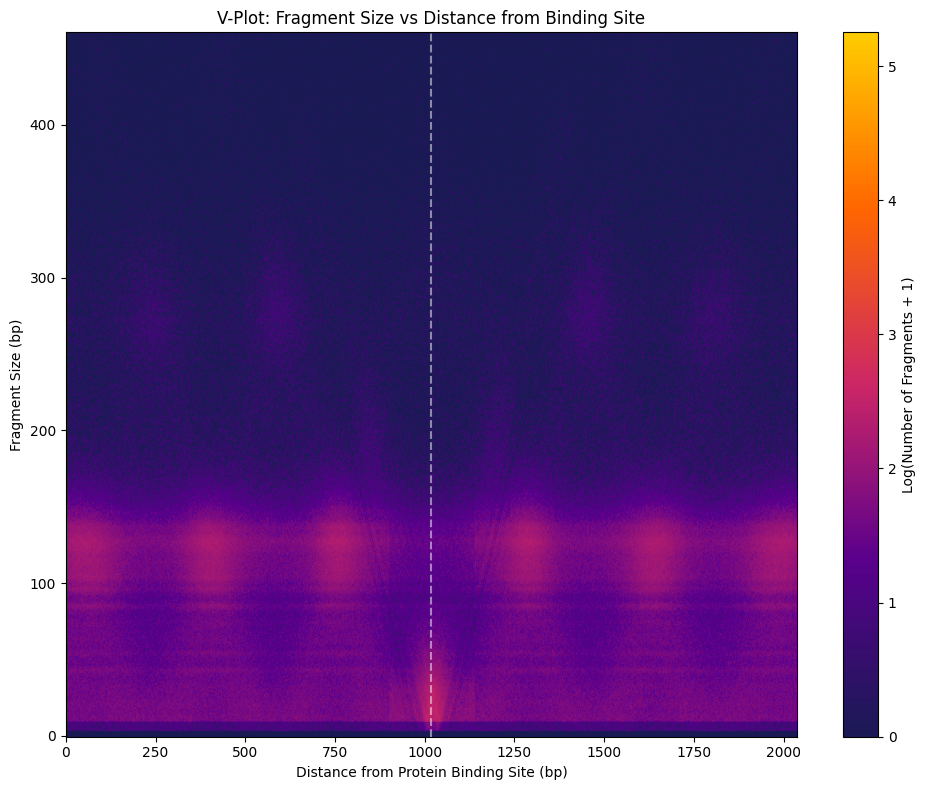

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Loading our DNA fragment data file - only need specific columns for analysis
dna_data = pd.read_csv('Required_Data/mapped.bed.gz', sep='\t', header=None, compression='gzip', usecols=[2,3,8,9])

# Main logic: Calculate the centers of our DNA regions and their differences
dna_data['prot_center'] = (dna_data[2] + dna_data[3]) / 2  # Center of protein binding region
dna_data['frag_center'] = (dna_data[8] + dna_data[9]) / 2  # Center of fragment
dna_data['pos_diff'] = dna_data['frag_center'] - dna_data['prot_center']  # X: relative position
dna_data['frag_size'] = dna_data[9] - dna_data[8]  # Y: fragment size

# Count how many fragments of each size appear at each position (our Z value)
count_matrix = dna_data.groupby(['frag_size', 'pos_diff']).size().reset_index(name='fragment_count')

# Turn our counts into a 2D matrix that we can visualize
vplot_matrix = count_matrix.pivot(index='frag_size', columns='pos_diff', values='fragment_count').fillna(0)

# Create the V-plot visualization with an improved color scheme
plt.figure(figsize=(10, 8))

# Creating a custom colormap - red-orange-yellow scheme that's great for highlighting the V pattern
# Dark blue for background (low counts), transitioning to bright red for high counts
colors = [(0.1, 0.1, 0.33), (0.35, 0.0, 0.55), (0.8, 0.15, 0.4), (1.0, 0.4, 0.0), (1.0, 0.8, 0.0)]
cmap_name = 'dna_binding_vplot'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

# Apply log transformation to better visualize the data range
vplot_data = np.log1p(vplot_matrix)  # log(1+x) to handle zeros

# Plot with the new colormap
img = plt.imshow(vplot_data, aspect='auto', origin='lower', cmap=cm)
plt.xlabel('Distance from Protein Binding Site (bp)')
plt.ylabel('Fragment Size (bp)')
plt.title('V-Plot: Fragment Size vs Distance from Binding Site')
plt.colorbar(img, label='Log(Number of Fragments + 1)')

# Add grid for better readability
plt.grid(False)

# Highlight the center (binding site) with a vertical line
plt.axvline(x=vplot_data.columns.get_loc(0) if 0 in vplot_data.columns else len(vplot_data.columns)//2, 
            color='white', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Why This Forms a V-Shape

The reason we expect to see a V-shape in our plot is pretty interesting! When a protein binds to DNA:

1. Directly at the binding site (X ≈ 0), we see mostly small fragments because the protein protects just that area

2. As we move away from the binding site (X moves away from 0), we start to see larger fragments because the nucleases can cut farther away

3. This creates a characteristic V-shape with the bottom of the V right at the protein binding site

It's kinda like how a shadow gets wider as you move away from an object. The DNA fragments get longer as we look farther from where the protein is sitting.

## Interpreting the Results

After we generate our plot, here's what to look for:

- A clear V-shape indicates proper protein binding and DNA protection
- The bottom tip of the V shows the exact binding site location
- The width of the V gives us info about the size of the protein-DNA complex
- Asymmetry in the V might indicate directional binding or scan preferences

This is a really common analysis technique in genomics research, especially for transcription factors and other DNA-binding proteins. The cool thing is that different proteins create slightly different V-patterns, which can tell us about how they interact with DNA!

## Conclusion

V-plots are a super useful visualization technique in bioinformatics that help us understand how proteins interact with DNA. By analyzing the protected fragments, we can identify precise binding sites and learn about the binding mechanics.

This assignment was pretty challenging but definitely worth it! I feel like I understand the concept of protein-DNA interactions way better now. It's amazing how a simple visual pattern can reveal so much about molecular biology processes.